# Part 1: Linear Regression with one variable

## a) Load the food truck data

In [184]:
import numpy as np
food_truck_data = np.loadtxt('./food_truck_data.txt',delimiter=',')
print('Collected data set with', food_truck_data.shape[0],'samples.')

Collected data set with 97 samples.


## b) Visualize the data

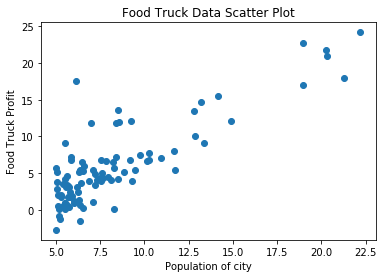

In [185]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(food_truck_data[:,0],food_truck_data[:,1])
plt.title('Food Truck Data Scatter Plot')
plt.xlabel('Population of city')
plt.ylabel('Food Truck Profit')
plt.show()

## c) Compute model parameters using gradient descent method

Iteration 0 	Loss, 8.383946894717734
Iteration 100 	Loss, 5.749880688265106
Iteration 200 	Loss, 5.364300411009995
Iteration 300 	Loss, 5.095517260441522
Iteration 400 	Loss, 4.908151914517163
Iteration 500 	Loss, 4.777541893840246
Iteration 600 	Loss, 4.686495294923758
Iteration 700 	Loss, 4.623027858571646
Iteration 800 	Loss, 4.578785508774439
Iteration 900 	Loss, 4.547944724459174
Iteration 1000 	Loss, 4.526446002498413
Iteration 1100 	Loss, 4.51145951443698
Iteration 1200 	Loss, 4.501012622532173
Iteration 1300 	Loss, 4.493730225881049
Iteration 1400 	Loss, 4.488653758978975
Iteration 1500 	Loss, 4.485115017896548
Iteration 1600 	Loss, 4.482648206098102
Iteration 1700 	Loss, 4.480928622690554
Iteration 1800 	Loss, 4.479729922774582
Iteration 1900 	Loss, 4.478894324174222

Model Parameters:  [[ 1.18084348 -3.77443845]]


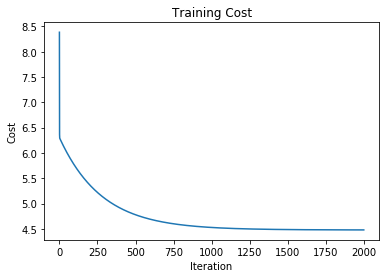

In [186]:
def criteria(y_true,y_pred):
    return 0.5*(1.0/y_true.shape[0])*np.sum(np.square(y_true-y_pred))

def compute_gradient(X,Y,parameters):
    y_pred = X.dot(parameters)
    loss = y_pred - Y
    gradient = np.dot(X.T,loss) / X.shape[0]
    return gradient

def update_parameters(gradient,parameters,learning_rate):
    return parameters - learning_rate*gradient
# Use gradient descent to estimate the parameters to solve regression below
# ŷ = Xθ
# Hyper-parameters
iterations = 2000
learning_rate = 0.01

parameters = np.random.rand(2,1)
X = np.stack((food_truck_data[:,0],np.ones_like(food_truck_data[:,0]))).T
y_true = np.expand_dims(food_truck_data[:,1],axis=1)
loss_tracker = np.zeros((iterations,1))

for i in range(iterations):
    y_pred = X.dot(parameters)
    cost = criteria(y_true,y_pred)
    if (i % 100 == 0):
        print('Iteration', i,'\tLoss,',cost)
    gradient = compute_gradient(X,y_true,parameters)
    parameters = update_parameters(gradient,parameters,learning_rate)
    loss_tracker[i] = cost

print('\nModel Parameters: ', parameters.T)
plt.figure()
plt.plot(np.arange(iterations),loss_tracker)
plt.title('Training Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

## d) Plot the data with the trained model

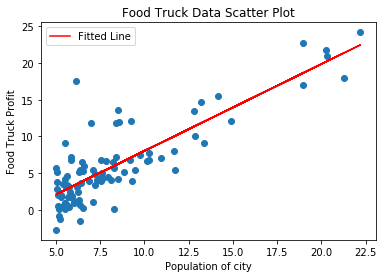

In [187]:
y_pred = X.dot(parameters)
plt.figure()
plt.scatter(food_truck_data[:,0],food_truck_data[:,1])
plt.title('Food Truck Data Scatter Plot')
plt.xlabel('Population of city')
plt.ylabel('Food Truck Profit')
plt.plot(food_truck_data[:,0],y_pred,label='Fitted Line',color='red')
plt.legend()

# Part 2: Linear Regression with multiple variables

## a) Load the house data

In [188]:
housing_price_data = np.loadtxt('./housing_price_data.txt',delimiter=',')
print('Collected data set with', housing_price_data.shape[0],'samples.')

Collected data set with 47 samples.


## b) Perform feature scaling and visualize the data

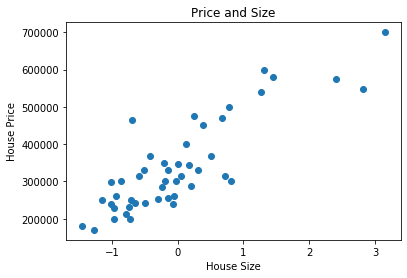

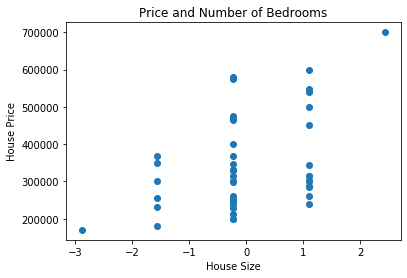

In [189]:
def feature_scale(X):
    mu = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    return (X-mu)/std,mu,std

features,mu,std = feature_scale(housing_price_data[:,0:2])
ones = np.ones((features.shape[0],1))
X = np.concatenate((features,ones),axis=1)
Y = np.expand_dims(housing_price_data[:,2],axis=1)

plt.figure()
plt.scatter(X[:,0],Y)
plt.title('Price and Size')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.figure()
plt.scatter(X[:,1],Y)
plt.title('Price and Number of Bedrooms')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.show()

## c) Compute the model parameters using gradient descent method

Iteration 0 	Loss, 65591307980.54756
Iteration 100 	Loss, 10596937623.601204
Iteration 200 	Loss, 3344765207.8025727
Iteration 300 	Loss, 2288003100.8103857
Iteration 400 	Loss, 2105447889.3084815
Iteration 500 	Loss, 2063782255.3975258
Iteration 600 	Loss, 2051066425.6733456
Iteration 700 	Loss, 2046409392.0002944
Iteration 800 	Loss, 2044562873.4085507
Iteration 900 	Loss, 2043809392.1722233

Model Parameters: [[108742.65901749  -5873.23267886 340397.96355918]]


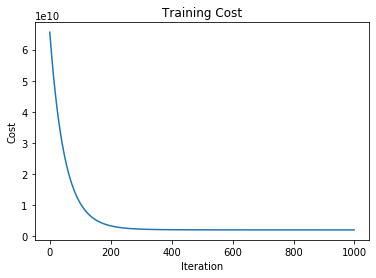

In [190]:
iterations = 1000
learning_rate = 0.01
parameters = np.random.rand(3,1)
y_true = Y
loss_tracker = np.zeros((iterations,1))
for i in range(iterations):
    y_pred = X.dot(parameters)
    cost = criteria(y_true,y_pred)
    if (i % 100 == 0):
        print('Iteration', i,'\tLoss,',cost)
    gradient = compute_gradient(X,y_true,parameters)
    parameters = update_parameters(gradient,parameters,learning_rate)
    loss_tracker[i] = cost

print('\nModel Parameters:',parameters.T)
plt.figure()
plt.plot(np.arange(iterations),loss_tracker)
plt.title('Training Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

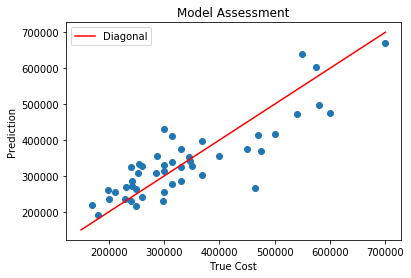

In [191]:
y_pred = X.dot(parameters)
plt.figure()
plt.scatter(y_true,y_pred)
plt.title('Model Assessment')
plt.xlabel('True Cost')
plt.ylabel('Prediction')
plt.plot(range(150000,700000),range(150000,700000),color='red',label='Diagonal')
plt.legend()
plt.show()

## d) Predict Market Price of My Home

In [201]:
size_of_house = 2250
bedroom_count = 4
my_house = np.array([size_of_house,bedroom_count])
my_house = (my_house - mu ) / std
my_house = np.expand_dims(np.concatenate((my_house,[1])).T,axis=0)
prediction = my_house.dot(parameters)
print('Features\nSquare feet:',size_of_house)
print('Beedrom count',bedroom_count)
print('\nHouse value:',round(prediction[0,0],2))

Features
Square feet: 2250
Beedrom count 4

House value: 368408.73
